In [73]:
from keras.models import load_model
import numpy as np
import cv2

model = load_model('kompletny.model')
def predict_digit_letter(img):
    #resize image to 28x28 pixels
    img = cv2.resize(img, (32, 32))
    #convert rgb to grayscale

    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,32,32,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    #print(np.argmax(res))
    #print(np.argmax(res))
    return np.argmax(res), max(res)

In [74]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('pitr.png')
original = img.copy()
ROI_number = 0
# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
gray = cv2.medianBlur(gray,5)

# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# apply some dilation and erosion to join the gaps
thresh = cv2.dilate(thresh,None,iterations = 3)
thresh = cv2.erode(thresh,None,iterations = 2)

# Find the contours
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
print(original[1,1])
# For each contour, find the bounding rectangle and draw it
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)
    ROI = original[y:y+h, x:x+w]

    ROI_number += 1

# Finally show the image
#cv2.imshow('img',img)
#cv2.imshow('res',thresh_color)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

[255 255 255]


In [275]:
img = cv2.imread('mat.png') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

im,im2=predict_digit_letter(img)
print(label[im])
print(im2)

M
0.71554786


In [345]:

import numpy as np
import cv2
from matplotlib import pyplot as plt

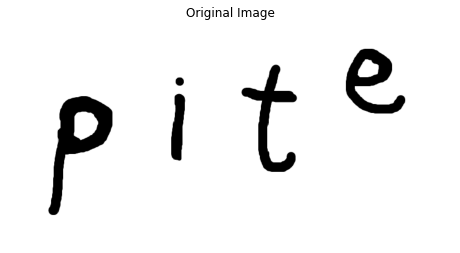

In [372]:
img = cv2.imread('pitr2.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.title("Original Image")
plt.show()

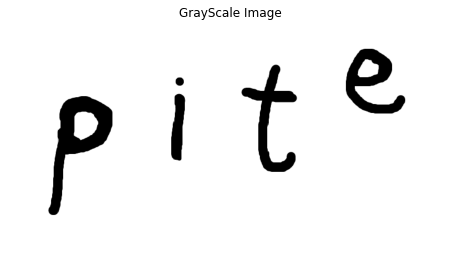

In [373]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(gray,cmap="gray")
plt.axis('off')
plt.title("GrayScale Image")
plt.show()

[[428.27371704 214.71929467]
 [693.66373841 113.57881894]
 [501.82673424 183.85350016]
 [328.78835979 112.78835979]
 [325.56977226 200.82608696]
 [133.10773394 221.37243676]]


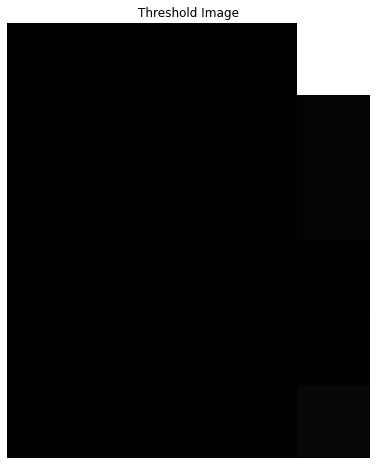

In [374]:


ret, thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)
output = cv2.connectedComponentsWithStats(thresh, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output
print(centroids)
plt.figure(figsize=(8,8))
plt.imshow(stats,cmap="gray")
plt.axis('off')
plt.title("Threshold Image")
plt.show()

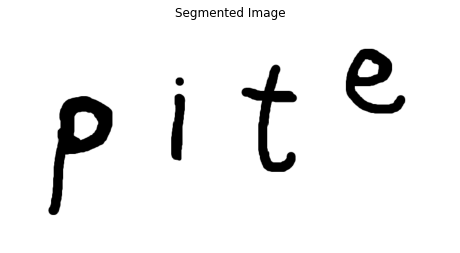

Pjte

In [376]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,kernel, iterations = 25

                           )

MIN_CONTOUR_AREA = 5000

bg = cv2.dilate(closing, kernel, iterations = 1)
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0)
ret, fg = cv2.threshold(dist_transform, 0.02*dist_transform.max(), 255, 0)
original = img.copy()
ROI_number = 0
plt.figure(figsize=(8,8))
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.title("Segmented Image")
plt.show()
contours,hierarchy = cv2.findContours(closing,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
# For each contour, find the bounding rectangle and draw it
#n=len(contours)
#contours=sorted(contours,key=cv2.contourArea,reverse=False)[:n]

for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt) 
        ROI = original[y-30:y+h+40, x-30:x+w+30]
        cv2.imwrite('ROI4_{}.png'.format(ROI_number), ROI)
        #plt.figure(figsize=(8,8))
        #plt.imshow(ROI,cmap="gray")
        #plt.axis('off')
        #plt.title("Segmented Image")
        #plt.show()
        ROI_number += 1

        img1 = cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)
        im,im2=predict_digit_letter(img1)
        print(label[im],end="")
    #print(im2)
#print(ROI_number);


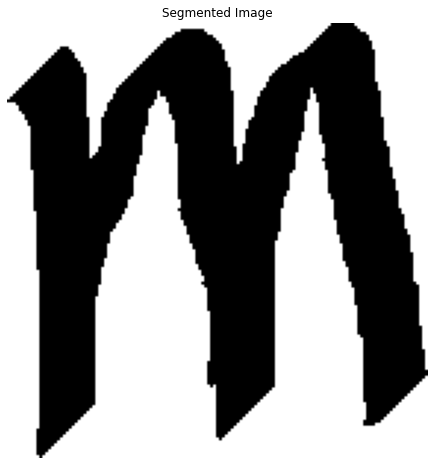

b
0.99991643


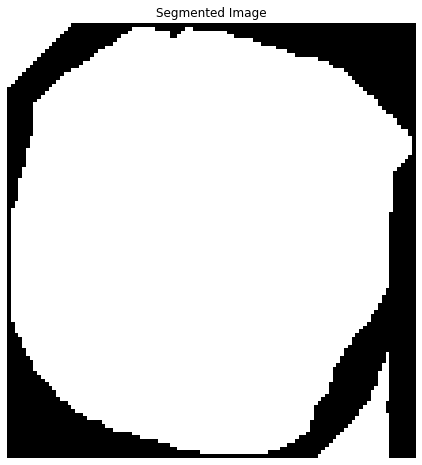

0
0.3641485


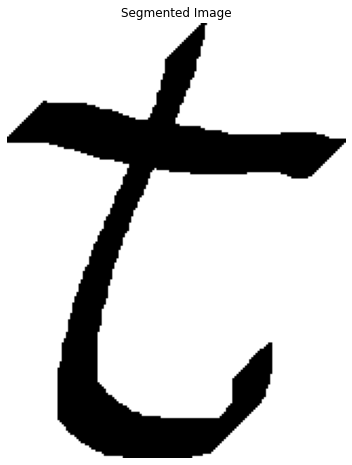

T
0.84001815


In [343]:
import cv2
import numpy as np
from imutils import contours

image = cv2.imread('mat.png')
mask = np.zeros(image.shape, dtype=np.uint8)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
(cnts, _) = contours.sort_contours(cnts, method="left-to-right")
ROI_number = 0
label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


for c in cnts:
    area = cv2.contourArea(c)
    if area < 15000 and area > 2000:
        x,y,w,h = cv2.boundingRect(c)
        ROI = 255 - thresh[y:y+h, x:x+w]
        cv2.drawContours(mask, [c], -1, (255,255,255), -1)
        cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        plt.figure(figsize=(8,8))
        plt.imshow(ROI,cmap="gray")
        plt.axis('off')
        plt.title("Segmented Image")
        plt.show()
        im,im2=predict_digit_letter(ROI)
        print(label[im])
        print(im2)
        ROI_number += 1

